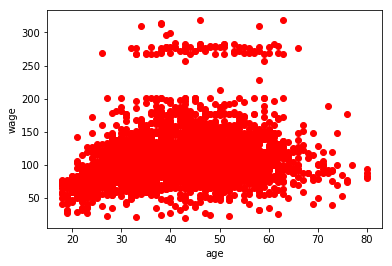

In [183]:
import pandas
import pylab as plt

pandas.read_csv('Wage.csv')
read_wage_data = pandas.read_csv('Wage.csv')
age = read_wage_data["age"]
wage = read_wage_data["wage"]

plt.xlabel("age")
plt.ylabel("wage")
plt.plot(age, wage, 'ro')

#there doesn't appear to be a linear relationship, there are patterns though, 
#such as the seperation of the clusters 

In [185]:
from sklearn.model_selection import train_test_split

age_train, age_test, wage_train, wage_test = train_test_split(read_wage_data["age"], read_wage_data["wage"], test_size = 0.20)

[0.70628768]


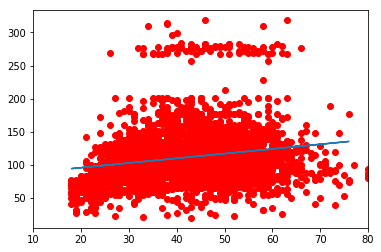

In [186]:
from sklearn.linear_model import LinearRegression
import numpy as np
x = wage_train
y = age_train.values.reshape(-1, 1)
reg = LinearRegression().fit(y, x)
y_test = age_test.values.reshape(-1, 1)
pred_y = reg.predict(y_test)

plt.plot(age, wage, 'ro')
plt.plot(age_test, pred_y)
plt.xlim(10, 80)
print(reg.coef_)

In [187]:
from sklearn.metrics import r2_score

x_test = age_test.values.reshape(-1, 1)
print(reg.score(y, x))
#the score tells us about the loss of our model, with a score of 1.0 showing no loss

0.03781231337801627


In [206]:
from  sklearn.preprocessing import PolynomialFeatures

X = age_train.values.reshape(-1, 1)
y = wage_train
poly = PolynomialFeatures(degree=4)
X = poly.fit_transform(age_test.values.reshape(-1, 1))
reg = LinearRegression().fit(X, wage_test)
score = reg.score(X_test, wage_test)
print(score)

0.08285941098660854


In [207]:
from sklearn.linear_model import Ridge

X = age_train.values.reshape(-1, 1)
y = wage_train
RReg = Ridge(alpha = 0.1)
poly = PolynomialFeatures(degree = 4)
X = poly.fit_transform(X)
RReg.fit(X, y)
print(RReg.coef_)
print(RReg.score(X, y))

[ 0.00000000e+00  2.16953495e+01 -5.81659286e-01  7.10298328e-03
 -3.37364790e-05]
0.08715472839351979


/home/daniel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.663357e-18
  overwrite_a=True).T
